<a href="https://colab.research.google.com/github/Jjioo/TP1_Features_Panorama/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/Jjioo/TP1_Features_Panorama/

Cloning into 'TP1_Features_Panorama'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 59 (delta 2), reused 56 (delta 2), pack-reused 0
Receiving objects: 100% (59/59), 30.08 MiB | 36.23 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [6]:
%cd /content/TP1_Features_Panorama/TP1_Features & Panorama

/content/TP1_Features_Panorama/TP1_Features & Panorama


**MID514 : Vision par Ordinateur**

> Rapport TP1 : Détection et correspondance des Points d’intérêts Assemblage d’images par l’utilisation des features




## **1.**

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger les images ship1 et ship2
ship1 = cv2.imread('images/ship1.pgm', 0)  # Charger l'image en niveaux de gris
ship2 = cv2.imread('images/ship2.pgm', 0)
print(ship1)
print(ship2)


[[231 231 231 ... 252 252 252]
 [230 230 230 ... 252 252 252]
 [228 227 229 ... 252 252 252]
 ...
 [165 157 159 ... 103 103 104]
 [171 179 180 ... 108 108 110]
 [180 189 179 ... 114 113 110]]
[[229 229 229 ...  15   3   3]
 [229 229 229 ...  15   3   3]
 [229 229 232 ...   3   3  15]
 ...
 [ 93  79  69 ... 191 198 181]
 [ 74  81  74 ... 148 152 174]
 [ 67  74  79 ... 157 130 144]]


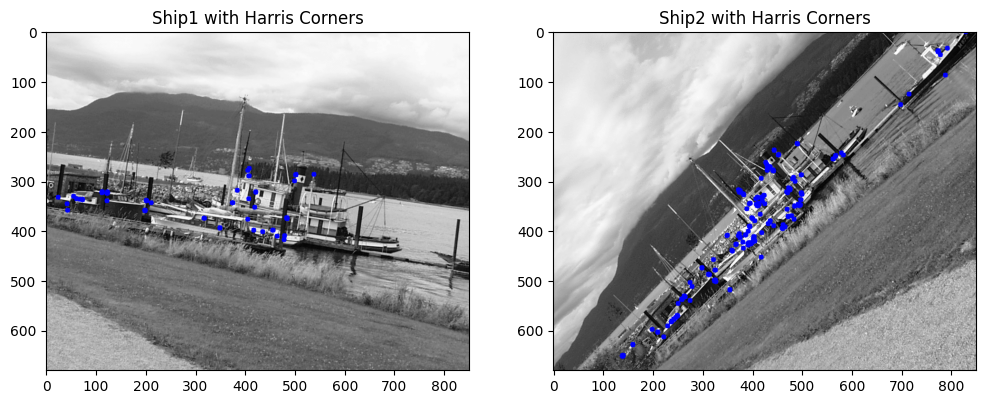

In [8]:
corner_response1 = cv2.cornerHarris(ship1, blockSize=2, ksize=3, k=0.04)
corner_response2 = cv2.cornerHarris(ship2, blockSize=2, ksize=3, k=0.04)

threshold = 0.01
corners1 = np.argwhere(corner_response1 > threshold)
corners2 = np.argwhere(corner_response2 > threshold)

# Show coins detected in images originale
ship1_colored = cv2.cvtColor(ship1, cv2.COLOR_GRAY2BGR)
ship2_colored = cv2.cvtColor(ship2, cv2.COLOR_GRAY2BGR)

for x, y in corners1:
    cv2.circle(ship1_colored, (y, x), 5, (0, 0, 255), -1)

for x, y in corners2:
    cv2.circle(ship2_colored, (y, x), 5, (0, 0, 255), -1)

# show images with coins détecté
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(ship1_colored), plt.title('Ship1 with Harris Corners')
plt.subplot(122), plt.imshow(ship2_colored), plt.title('Ship2 with Harris Corners')
plt.show()


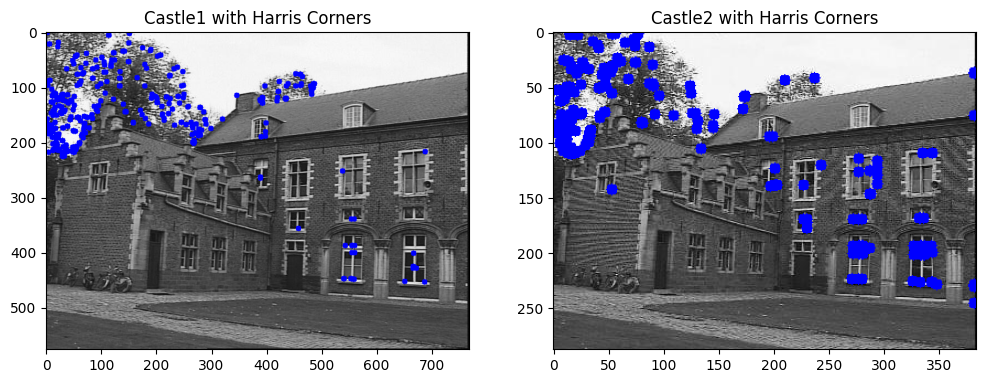

In [9]:
# Charger les images castle1 et castle2
castle1 = cv2.imread('images/castle1.jpg', 0)
castle2 = cv2.imread('images/castle2.jpg', 0)

# Utiliser la fonction cv2.cornerHarris pour détecter les coins (features) dans les images
corner_response1 = cv2.cornerHarris(castle1, blockSize=2, ksize=3, k=0.04)
corner_response2 = cv2.cornerHarris(castle2, blockSize=2, ksize=3, k=0.04)

# Vous pouvez également seuiller les valeurs de corner_response pour obtenir les coins détectés
threshold = 0.01
corners1 = np.argwhere(corner_response1 > threshold)
corners2 = np.argwhere(corner_response2 > threshold)

# Afficher les coins détectés sur les images originales
castle1_colored = cv2.cvtColor(castle1, cv2.COLOR_GRAY2BGR)
castle2_colored = cv2.cvtColor(castle2, cv2.COLOR_GRAY2BGR)

for x, y in corners1:
    cv2.circle(castle1_colored, (y, x), 5, (0, 0, 255), -1)

for x, y in corners2:
    cv2.circle(castle2_colored, (y, x), 5, (0, 0, 255), -1)

# Afficher les images avec les coins détectés
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(castle1_colored), plt.title('Castle1 with Harris Corners')
plt.subplot(122), plt.imshow(castle2_colored), plt.title('Castle2 with Harris Corners')
plt.show()


## **2.**

### l'algorithme Harris n'est pas parfaitement robuste par rapport à la rotation,l'algorithme Harris n'est pas parfait.

En résumé, les résultats obtenus avec l'algorithme Harris de détection de coins sont similaires pour les paires d'images ship1 et ship2 ainsi que castle1 et castle2, malgré une rotation de 90 degrés entre les images. Cela s'explique par la présence de caractéristiques similaires, notamment des coins et des bords bien définis, dans ces images.

Toutefois, il est important de noter que l'algorithme Harris n'est pas exempt de limitations. Il peut ne pas détecter tous les coins dans certaines situations et peut également identifier des coins fictifs.

## **3.**

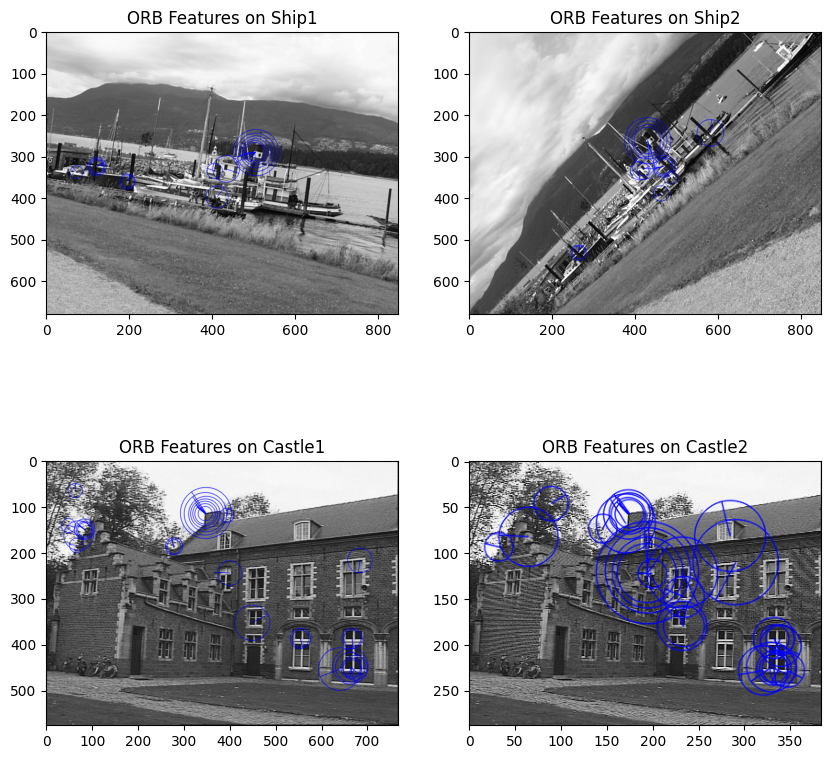

In [10]:
def detect_and_visualize_orb_features(image, nfeatures=15, title="ORB Features"):
    orb = cv2.ORB_create(nfeatures=nfeatures)
    keypoints, descriptors = orb.detectAndCompute(image, None)
    image_with_keypoints = cv2.drawKeypoints(
        image,
        keypoints,
        None,
        color=(0, 0, 255),  # Red color
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    return image_with_keypoints, title


# Detect and visualize ORB features on all images
ship1_img, ship1_title = detect_and_visualize_orb_features(ship1, nfeatures=15, title='ORB Features on Ship1')
ship2_img, ship2_title = detect_and_visualize_orb_features(ship2, nfeatures=15, title='ORB Features on Ship2')
castle1_img, castle1_title = detect_and_visualize_orb_features(castle1, nfeatures=30, title='ORB Features on Castle1')
castle2_img, castle2_title = detect_and_visualize_orb_features(castle2, nfeatures=30, title='ORB Features on Castle2')

# Create a 2x2 grid of images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(ship1_img)
axs[0, 0].set_title(ship1_title)
axs[0, 1].imshow(ship2_img)
axs[0, 1].set_title(ship2_title)
axs[1, 0].imshow(castle1_img)
axs[1, 0].set_title(castle1_title)
axs[1, 1].imshow(castle2_img)
axs[1, 1].set_title(castle2_title)

# Remove axis labels
for ax in axs.flat:
    ax.axis
